In [1]:
print("modules working fine")

modules working fine


In [2]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: /Users/apple/Documents/Dev_Stuff/autoresearch/self_learning


In [3]:
from research_and_analyst.utils.model_loader import ModelLoader

In [4]:
model_loader = ModelLoader()

{"timestamp": "2025-10-17T18:37:53.268696Z", "level": "info", "event": "Running in LOCAL mode: .env loaded"}
{"timestamp": "2025-10-17T18:37:53.269146Z", "level": "info", "event": "Loaded GROQ_API_KEY from individual env var"}
{"timestamp": "2025-10-17T18:37:53.269527Z", "level": "info", "event": "Loaded GOOGLE_API_KEY from individual env var"}
{"timestamp": "2025-10-17T18:37:53.269855Z", "level": "info", "event": "Loaded ASTRA_DB_API_ENDPOINT from individual env var"}
{"timestamp": "2025-10-17T18:37:53.270273Z", "level": "info", "event": "Loaded ASTRA_DB_APPLICATION_TOKEN from individual env var"}
{"timestamp": "2025-10-17T18:37:53.270713Z", "level": "info", "event": "Loaded ASTRA_DB_KEYSPACE from individual env var"}
{"keys": {"GROQ_API_KEY": "gsk_o4...", "GOOGLE_API_KEY": "AIzaSy...", "ASTRA_DB_API_ENDPOINT": "https:...", "ASTRA_DB_APPLICATION_TOKEN": "AstraC...", "ASTRA_DB_KEYSPACE": "defaul..."}, "timestamp": "2025-10-17T18:37:53.271087Z", "level": "info", "event": "API keys loade

In [5]:
llm = model_loader.load_llm()

{"provider": "google", "model": "gemini-2.0-flash", "timestamp": "2025-10-17T18:37:53.275774Z", "level": "info", "event": "Loading LLM"}
E0000 00:00:1760726273.297278   39498 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [6]:
llm.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--654a1950-5b29-4240-85b0-4ae70f556217-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [7]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver


### Examples of Analysts

Analyst( name="Dr. Neha Patel", role="Medical Data Scientist", affiliation="Stanford Medicine", description="Focuses on predictive models for patient outcomes." ),

Analyst( name="Dr. Arun Verma", role="Ethics Researcher", affiliation="WHO", description="Explores ethical implications of AI in diagnostics." ), Analyst( name="Ms. Priya Sharma", role="Policy Analyst", affiliation="Ministry of Health", description="Investigates AI policy and compliance frameworks." )

In [8]:
class Analyst(BaseModel):
    name:str = Field(description="Name of the analyst")
    role:str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")

    @property
    def persona(self)->str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [9]:
Analyst(
    name = "Akash Naskar",
    role = "genai eng",
    affiliation = "AI research lab",
    description="i am a genai dev"
)

Analyst(name='Akash Naskar', role='genai eng', affiliation='AI research lab', description='i am a genai dev')

In [10]:
analyst = Analyst(
    name="Akash Naskar",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [11]:
analyst.name

'Akash Naskar'

In [12]:
analyst.role

'genai eng'

In [13]:
analyst.affiliation

'AI Research LAB'

In [14]:
print(analyst.persona)

Name: Akash Naskar
Role: genai eng
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [15]:
class Perspectives(BaseModel):
    analysts: List[Analyst]= Field(description="Comprehensive lists of analysts wioth their roles annd affilation")

In [16]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions

In [17]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [18]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [19]:
analyst_instructions = """You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [20]:
## This is to show how the message will be passed to the AI
print([analyst_instructions.format(
    topic="education",
    max_analysts = 4,
    human_analyst_feedback = "Please explain on AI"
)] +["Generate a set of analysts"])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nPlease explain on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate a set of analysts']


In [21]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}

In [22]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'} 
    )

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on identifying and addressing health disparities across different socioeconomic groups. Concerned with ensuring equitable access to healthcare and promoting preventative measures.'),
  Analyst(name='Dr. David Chen', role='Healthcare Policy Analyst', affiliation='The Kaiser Family Foundation', description='Specializes in analyzing healthcare policy and its impact on cost, access, and quality of care. Motivated by finding evidence-based solutions to improve the efficiency and effectiveness of the healthcare system.')]}

In [23]:
# # NOTE: This snippet assumes `Analyst`, `BaseModel`, `Field`, `List`, `TypedDict`,
# # `llm`, `SystemMessage`, and `HumanMessage` are already imported/defined in the environment.

# class Perspectives(BaseModel):
#     # Pydantic model that the LLM will populate.
#     # Field name is `analyst` (singular) and contains a list of Analyst objects.
#     analyst: List[Analyst] = Field(description="Comprehensive lists of analysts with their roles and affiliation")

# class GenerateAnalystsState(TypedDict):
#     # TypedDict describing the state contract passed into create_analyst.
#     topic: str  # research topic
#     max_analysts: int  # number of analysts to request
#     human_analyst_feedback: str  # optional human/editorial feedback
#     analysts: List[Analyst]  # list of analysts in state (to be filled/updated)

# # DO NOT call a TypedDict like a constructor (will raise TypeError). Keep as a type only.
# # GenerateAnalystsState(
# #     topic="finance",
# #     max_analysts=5,
# #     human_analyst_feedback="give the real info",
# # )

# # Standalone instantiation is a no-op and can error if `Analyst` isn't in scope; comment out.
# # Analyst(
# #     name="Dr. Neha Patel",
# #     role="Medical Data Scientist",
# #     affiliation="Stanford Medicine",
# #     description="Focuses on predictive models for patient outcomes."
# # )

# # Close the triple-quoted prompt string BEFORE defining the function (prevents syntax errors).
# analyst_instructions = """You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

# 1. First, review the research topic:
# {topic}

# 2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
# {human_analyst_feedback}

# 3. Determine the most interesting themes based upon documents and / or feedback above.

# 4. Pick the top {max_analysts} themes.

# 5. Assign one analyst to each theme.
# """

# def create_analyst(state: GenerateAnalystsState):
#     """
#     Creates analyst personas using an LLM that returns a Pydantic `Perspectives` object.
#     - Reads topic, max_analysts, and optional feedback from `state`
#     - Formats a system prompt
#     - Invokes the LLM with structured output into `Perspectives`
#     - Returns a dict containing the generated analysts under the 'analysts' key
#     """
#     # Extract required inputs from the state dictionary.
#     topic = state["topic"]
#     max_analysts = state["max_analysts"]
#     human_analyst_feedback = state.get("human_analyst_feedback", "")

#     # Ask the LLM to produce output that validates against the `Perspectives` schema.
#     structured_llm = llm.with_structured_output(Perspectives)

#     # Build the system message by injecting state values into the template.
#     system_messages = analyst_instructions.format(
#         topic=topic,
#         max_analysts=max_analysts,
#         human_analyst_feedback=human_analyst_feedback
#     )

#     # Invoke the model with both the system instruction and a simple human prompt.
#     perspectives: Perspectives = structured_llm.invoke(
#         [SystemMessage(content=system_messages)] + [HumanMessage(content="Generate the set of analysts.")]
#     )

#     # IMPORTANT MINIMAL FIX:
#     # `Perspectives` has field `analyst` (singular). Access that field and return it under the plural key.
#     # This avoids AttributeError: 'Perspectives' object has no attribute 'analysts'.
#     return {"analysts": perspectives.analyst}

# # Example call (kept as-is, now uses the corrected function).
# create_analyst(
#     {
#         'topic': 'health',
#         'max_analysts': 2,
#         'human_analyst_feedback': 'give the real info'
#     }
# )


In [30]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'} 
    )

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on identifying and addressing health disparities across different socioeconomic groups. Concerned with ensuring equitable access to healthcare and promoting preventative measures.'),
  Analyst(name='Dr. David Chen', role='Healthcare Policy Analyst', affiliation='The Kaiser Family Foundation', description='Specializes in analyzing healthcare policy and its impact on cost, access, and quality of care. Motivated by finding evidence-based solutions to improve the efficiency and effectiveness of the healthcare system.')]}

{'analysts': 
[Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on identifying and addressing health disparities across different socioeconomic groups. Concerned with ensuring equitable access to healthcare and promoting preventative measures.'),


Analyst(name='Dr. David Chen', role='Healthcare Policy Analyst', affiliation='The Kaiser Family Foundation', description='Specializes in analyzing healthcare policy and its impact on cost, access, and quality of care. Motivated by finding evidence-based solutions to improve the efficiency and effectiveness of the healthcare system.')]}

In [31]:
def human_feedback(state):
    """No op-node that should be use to interrupt"""
    pass


In [32]:
def should_continue(state):
    """Return the next node to execute"""
    human_analyst_feedback = state.get("human_analyst_feedback",None)

In [33]:
from IPython.display import Image, display
builder = StateGraph(GenerateAnalystsState)

In [34]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback",human_feedback)

In [35]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                              should_continue,
                              ["create_analyst", END])

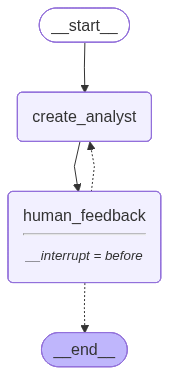

In [36]:
memory = MemorySaver()
graph = builder.compile(interrupt_before=["human_feedback"], checkpointer=memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [37]:
topic = "the benefits of adopting Langgraph as an agent framework"
max_analysts = 4
thread = {"configurable":{"thread_id":1}}

In [38]:
for event in graph.stream({"topic":topic,
                           "max_analysts":max_analysts},
                           thread, stream_mode="values"):
    analysts = event.get("analysts",'')

    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Alice Lang
Affiliation: Tech Solutions Inc.
Role: AIops Engineer
Description: Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.
--------------------------------------------------
Name: Bob Builder
Affiliation: Innovation Labs
Role: Lead Developer
Description: Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.
--------------------------------------------------
Name: Charlie Chatsworth
Affiliation: Global Consulting Group
Role: AI Strategist
Description: Examines the strategic advantages of adopting Langgraph, such as improved agent collaboration, enhanced decision-making, and increased business agility. Co

In [39]:
state = graph.get_state(thread)
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.'), Analyst(name='Bob Builder', role='Lead Developer', affiliation='Innovation Labs', description='Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.'), Analyst(name='Charlie Chatsworth', role='AI Strategist', affiliation='Global Consulting Group', description='Examines the strategic advantages of adopting Langgraph, such as improved agent collab

In [40]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.'),
  Analyst(name='Bob Builder', role='Lead Developer', affiliation='Innovation Labs', description='Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.'),
  Analyst(name='Charlie Chatsworth', role='AI Strategist', affiliation='Global Consulting Group', description='Examines the strategic advantages of adopting Langgraph, such as improved agent collaboration, enhanc

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Ava Chen', role='AIops Engineer', affiliation='TechForward Solutions', description='Focuses on the practical benefits of Langgraph in streamlining AI workflows and improving system observability.'), Analyst(name='Ben Carter', role='Data Scientist', affiliation='Innovate Analytics', description="Explores Langgraph's capabilities in enhancing data processing pipelines and enabling more sophisticated data analysis techniques."), Analyst(name='Zara Khan', role='Research Scientist', affiliation='Future AI Labs', description='Investigates the potential of Langgraph in advancing AI research, particularly in areas like multi-agent systems and complex problem-solving.'), Analyst(name='Kenji Tanaka', role='Software Architect', affiliation='Global Systems Inc.', description="Evaluates Langgraph's architecture and its impact on the scalability and maintainability of AI applications.")]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a5554-74aa-6ba8-8001-764bc93b0614'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-09T21:16:53.536410+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a5554-5adf-623c-8000-4960456dfd8a'}}, tasks=(PregelTask(id='c425fb94-280c-bc9d-b46f-bed325308745', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [41]:
state.next

('human_feedback',)

In [42]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0ab887-73fc-6cd8-bfff-b802e9af7d7a': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-17T18:38:25.305716+00:00\xa2id\xd9$1f0ab887-73fc-6cd8-bfff-b802e9af7d7a\xb0channel_versions\x81\xa9__start__\xd9400000000000000000000000000000001.0.11272807097375104\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0ab887-7400-6af4-8000-e650fa4b11cb': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-17T18:38:25.307307+00:00\xa2id\xd9$1f0ab887-7400-6af4-8000-e650fa4b11cb\xb0channel_versions\x84\xa9__start__\xd9300000000000000000000000000000002.0.5196659673979396\xa5topic\xd9300000000000000000000000000000002.0.5196659673979396\xacmax_analysts\xd9300000000000000000000000000000002.0.5196659673979396\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.5196659673979396\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\x

In [43]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ab887-9608-63f4-8001-e5c6e39923c2'}}

In [44]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

KeyError: None

In [ ]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Alice Lang
Affiliation: Tech Solutions Inc.
Role: AIops Engineer
Description: Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.
--------------------------------------------------
Name: Bob Builder
Affiliation: Innovation Labs
Role: Lead Developer
Description: Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.
--------------------------------------------------
Name: Charlie Chatsworth
Affiliation: Global Consulting Group
Role: AI Strategist
Description: Examines the strategic advantages of adopting Langgraph, such as improved agent collaboration, enhanced decision-making, and increased business agility. Co

In [45]:
state = graph.get_state(thread)

In [46]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.'), Analyst(name='Bob Builder', role='Lead Developer', affiliation='Innovation Labs', description='Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.'), Analyst(name='Charlie Chatsworth', role='AI Strategist', affiliation='Global Consulting Group', description='Examines the strategic advantages of adopting Langgraph, such as improved agent collab

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.'), Analyst(name='Bob Builder', role='Lead Developer', affiliation='Innovation Labs', description='Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.'), Analyst(name='Charlie Chatsworth', role='AI Strategist', affiliation='Global Consulting Group', description='Examines the strategic advantages of adopting Langgraph, such as improved agent collaboration, enhanced decision-making, and increased business agility. Concerned with how Langgraph can drive innovation and create competitive advantages for organizations.'), Analyst(name='Diana Data', role='Data Scientist', affiliation='Analytics Corp', description='Focuses on the data aspects of Langgraph, including data integration, data quality, and data security. Concerned with how Langgraph can leverage data to improve agent performance and ensure data privacy and compliance.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ab5d2-88c7-6cb0-8004-558ec26cf3f7'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-10-17T13:28:24.908895+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ab5d2-60c8-6232-8003-8eb75a750e67'}}, tasks=(PregelTask(id='95f380f0-a155-1bda-ad02-d3cb1f3c266e', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [47]:
state.next

('human_feedback',)

In [48]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational aspects of Langgraph, including scalability, monitoring, and maintenance. Concerned with the practical challenges of deploying and managing Langgraph in production environments, and seeks to optimize its performance and reliability.'),
  Analyst(name='Bob Builder', role='Lead Developer', affiliation='Innovation Labs', description='Interested in the developer experience of Langgraph, focusing on ease of use, flexibility, and debugging capabilities. Motivated by making Langgraph accessible and efficient for developers to build complex agent workflows.'),
  Analyst(name='Charlie Chatsworth', role='AI Strategist', affiliation='Global Consulting Group', description='Examines the strategic advantages of adopting Langgraph, such as improved agent collaboration, enhanc

In [49]:
further_feedback= ""

#Get the latest stage
state = graph.get_state(thread)


In [50]:
# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [51]:
graph.update_state(cfg, {"human_analyst_feedback":""}, as_node="human_feedback")

KeyError: None